In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from matplotlib import rc
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import MaxNLocator
import scipy.signal
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import dill
import sys
sys.path.append('../')
from modelfitting import train_test_split, ROC_curve, PR_curve, stable_unstable_hist, calibration_plot, unstable_error_fraction

In [22]:
datapath = '/mnt/ssd/Dropbox/Dropbox (Princeton)/workspace/stability/MLstability/training_data/'
dset = 'resonant/'
featurefolder = 'orbsummaryfeaturesxgbNorbits10000.0Nout1000window10/'
features = []
features += ['avg_iH1', 'avg_iH2']
features += ['norm_std_a1', 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1']
features += ['norm_std_a2', 'norm_max_a2', 'norm_std_window10_a2', 'norm_max_window10_a2']
features += ['norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3']
features += ['avg_ecross1', 'std_ecross1', 'max_ecross1', 'min_ecross1']
features += ['avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2']
features += ['avg_ecross3', 'std_ecross3', 'max_ecross3', 'min_ecross3']
features += ['norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope']
features += ['avg_beta12','std_beta12','min_beta12','max_beta12','avg_beta23','std_beta23','min_beta23','max_beta23'] 

In [23]:
trainingdatafolder = datapath+dset+featurefolder
trainX, trainY, testX, testY = train_test_split(trainingdatafolder, features)

In [6]:
trainX

,avg_iH1,avg_iH2,norm_std_a1,norm_max_a1,norm_std_window10_a1,norm_max_window10_a1,norm_std_a2,norm_max_a2,norm_std_window10_a2,norm_max_window10_a2,...,norm_a2_slope,norm_a3_slope,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,max_beta23
0,0.469412,0.305877,1.507391e-05,0.000054,1.717683e-05,3.086117e-05,0.000011,0.000060,0.000010,0.000017,...,1.579422e-14,-1.328609e-12,28.595534,0.001890,28.589437,28.602055,3.701169,0.033944,3.521541,3.745299
1,3.306766,1.733165,7.816282e-05,0.000341,1.045669e-04,2.963870e-04,0.000032,0.000084,0.000033,0.000060,...,-7.967625e-14,1.914185e-12,13.483037,0.005900,13.456567,13.493507,4.539888,0.052812,4.409433,4.621959
2,0.544402,0.283334,3.428543e-04,0.001693,1.540127e-04,2.936359e-04,0.000027,0.000080,0.000032,0.000062,...,-1.998956e-14,1.732883e-16,5.870287,0.017665,5.783332,5.892522,28.628449,0.001945,28.622706,28.631477
3,1.548626,1.987273,5.024557e-05,0.000106,1.832348e-05,2.641886e-05,0.000462,0.000908,0.000216,0.000297,...,6.785336e-12,6.262206e-14,15.489569,0.027443,15.440107,15.543339,21.682048,0.033527,21.613107,21.742780
4,3.655932,1.392835,1.819902e-04,0.000720,5.854552e-05,8.879566e-05,0.000319,0.001340,0.000192,0.000342,...,-3.021927e-12,-5.494854e-13,5.324380,0.034673,5.200037,5.475681,10.280581,0.016301,10.213489,10.338279
5,0.157152,0.359021,5.363859e-05,0.000223,9.586428e-05,1.516153e-04,0.000057,0.000225,0.000055,0.000116,...,1.699286e-13,3.605738e-12,15.891237,0.008814,15.860984,15.920362,5.476705,0.043321,5.319875,5.575508
6,0.660999,1.732973,2.175227e-05,0.000070,1.568709e-05,2.776305e-05,0.000056,0.000165,0.000044,0.000083,...,-1.646907e-12,-2.768964e-12,17.787983,0.004023,17.775677,17.795285,8.600147,0.022414,8.549344,8.643841
7,2.650126,3.397647,1.101936e-03,0.002198,9.323815e-05,1.842489e-04,0.006878,0.013445,0.000513,0.000938,...,1.249179e-09,-1.939969e-10,7.693395,0.804030,6.186890,9.272822,16.254778,1.078196,14.233221,18.293300
8,1.741957,1.473751,9.770166e-05,0.000352,6.022109e-05,1.542207e-04,0.000062,0.000186,0.000027,0.000065,...,-1.240234e-14,-2.781428e-12,14.169246,0.006762,14.146148,14.182055,3.700066,0.052733,3.462903,3.789567
9,1.613526,1.482238,2.974931e-04,0.001123,1.774650e-04,2.917574e-04,0.000014,0.000054,0.000013,0.000022,...,-6.163849e-14,9.035980e-12,11.065051,0.013847,11.012355,11.087435,4.890209,0.085969,4.646103,5.082829


In [7]:
space ={
        'max_depth': hp.randint('x_max_depth',  20),
        'min_child_weight': hp.quniform ('x_min_child', 1, 10, 1),
        'subsample': hp.uniform ('x_subsample', 0.8, 1),
        'scale_pos_weight': hp.uniform("x_pos_weight", 1, 15),
        "learning_rate":hp.uniform("x_learning_rate",0.01,0.2),
        'colsample_bytree': hp.uniform ('x_tree_colsample', 0.5,1),
}

dtrain = xgb.DMatrix(trainX, trainY)
dtest = xgb.DMatrix(testX, testY)
def objective(space):

    clf = XGBClassifier(n_estimators = 100, 
                            max_depth = space['max_depth'], 
                            min_child_weight =space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree =space['colsample_bytree'],
                            learning_rate = space['learning_rate'], seed = 0)
    
    params = clf.get_xgb_params()
    #dtest
    score = xgb.cv(params, dtrain, nfold = 5, metrics = "auc", early_stopping_rounds=10)
    #print score
    #score = cross_val_score(clf, trainX, trainY, cv = 5, scoring="average_precision")
    avg_score =  np.mean(score["test-auc-mean"])
    error = np.mean(score["test-auc-std"])
    
    bst = xgb.train(params, dtrain)
    preds = bst.predict(dtest)
    test_score = metrics.roc_auc_score(testY, preds)
    
    print("SCORE:", avg_score, "ERROR", error, "HOLDOUT SCORE", test_score)

    return{'loss':1-test_score, 'status': STATUS_OK, "cv_score":avg_score , "cv_error":error, "holdout":test_score }

/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [8]:
%%time
trials = Trials()
import time
start = time.time()
best = fmin(fn=objective, space = space, algo = tpe.suggest, max_evals = 50, trials = trials)
end = time.time()
print("Optimization Time: %f seconds", (end  -start))

SCORE:                                              
0.8933318399999999                                  
ERROR                                               
0.007810512746446244                                
HOLDOUT SCORE                                       
0.9101744668505383                                  
SCORE:                                                                        
0.8940232400000001                                                            
ERROR                                                                         
0.00543374129994505                                                           
HOLDOUT SCORE                                                                 
0.9073555812035439                                                            
SCORE:                                                                        
0.89314324                                                                    
ERROR                                             

0.008381539431228636                                                           
HOLDOUT SCORE                                                                  
0.8807554360150965                                                             
SCORE:                                                                         
0.8332389000000001                                                             
ERROR                                                                          
0.01218177665980646                                                            
HOLDOUT SCORE                                                                  
0.8537872520489183                                                             
SCORE:                                                                         
0.5                                                                            
ERROR                                                                          
0.0                                     

In [9]:
best

{'x_learning_rate': 0.1998650536642028,
 'x_max_depth': 14,
 'x_min_child': 8.0,
 'x_pos_weight': 4.2406460719932575,
 'x_subsample': 0.8742324845795433,
 'x_tree_colsample': 0.5010888294505065}

In [10]:
best_xgbc = XGBClassifier(n_estimators=100, scale_pos_weight=best["x_pos_weight"],
                         learning_rate = best["x_learning_rate"], 
                         max_depth = int(best["x_max_depth"]), 
                         min_child_weight = best["x_min_child"],
                         subsample = best["x_subsample"], 
                         colsample_bytree = best["x_tree_colsample"])
params = best_xgbc.get_xgb_params()
score = xgb.cv(params, dtrain, nfold = 5, metrics = "auc", verbose_eval=True)
print(score)
d_Train = xgb.DMatrix(trainX, trainY)
d_Test = xgb.DMatrix(testX)
bst = xgb.train(params, d_Train)
preds = bst.predict(d_Test)
score = metrics.average_precision_score(testY, preds)
print(score)

[0]	train-auc:0.923938+0.00182591	test-auc:0.852011+0.0100524
[1]	train-auc:0.954429+0.00265286	test-auc:0.881048+0.00934087
[2]	train-auc:0.965003+0.00184963	test-auc:0.890593+0.00926674
[3]	train-auc:0.971759+0.00115513	test-auc:0.898173+0.00689597
[4]	train-auc:0.976322+0.00114773	test-auc:0.903275+0.00609929
[5]	train-auc:0.979837+0.000975586	test-auc:0.907353+0.00493857
[6]	train-auc:0.982675+0.000979318	test-auc:0.909948+0.00450302
[7]	train-auc:0.985117+0.000673619	test-auc:0.913125+0.00437201
[8]	train-auc:0.986929+0.000672633	test-auc:0.914934+0.00501803
[9]	train-auc:0.988474+0.00066443	test-auc:0.915565+0.00508378
   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.923938       0.001826       0.852011      0.010052
1        0.954429       0.002653       0.881048      0.009341
2        0.965003       0.001850       0.890593      0.009267
3        0.971759       0.001155       0.898173      0.006896
4        0.976322       0.001148       0.903275      0.00

/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/dtamayo/miniconda3/envs/ml/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


0.7899340268791681


In [11]:
model = XGBClassifier(n_estimators=100, scale_pos_weight=best["x_pos_weight"],
                         learning_rate = best["x_learning_rate"], 
                         max_depth = int(best["x_max_depth"]), 
                         min_child_weight = best["x_min_child"],
                         subsample = best["x_subsample"], 
                         colsample_bytree = best["x_tree_colsample"])

model.fit(trainX, trainY)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.5010888294505065, gamma=0,
              learning_rate=0.1998650536642028, max_delta_step=0, max_depth=14,
              min_child_weight=8.0, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=4.2406460719932575,
              seed=None, silent=True, subsample=0.8742324845795433)

Text(0.5, 1.0, 'ROC curve (AUC = 0.923)')

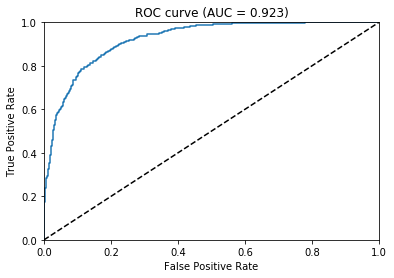

In [12]:
roc_auc, fpr, tpr, ROCthresholds = ROC_curve(trainingdatafolder, model, features)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve (AUC = {0:.3f})'.format(roc_auc))

In [13]:
pr_auc, precision, recall, PRthresholds = PR_curve(trainingdatafolder, model, features)
for i in range(0,len(recall), 15):
    print("Threshold {0}, recall = {1}, precision = {2}".format(PRthresholds[i], recall[i], precision[i]))

Threshold 0.0006330719916149974, recall = 1.0, precision = 0.3224076281287247
Threshold 0.0006884142057970166, recall = 0.9981515711645101, precision = 0.3247143716175586
Threshold 0.0007449562544934452, recall = 0.9981515711645101, precision = 0.3276699029126214
Threshold 0.0008184813777916133, recall = 0.9981515711645101, precision = 0.3306797305572566
Threshold 0.0008788442355580628, recall = 0.9981515711645101, precision = 0.3337453646477132
Threshold 0.0009757645311765373, recall = 0.9981515711645101, precision = 0.3368683718028696
Threshold 0.001055232249200344, recall = 0.9981515711645101, precision = 0.34005037783375314
Threshold 0.0011426247656345367, recall = 0.9981515711645101, precision = 0.34329307056579783
Threshold 0.0012478260323405266, recall = 0.9981515711645101, precision = 0.3465982028241335
Threshold 0.0013971047010272741, recall = 0.9981515711645101, precision = 0.34996759559300067
Threshold 0.0015043275197967887, recall = 0.9981515711645101, precision = 0.3534031

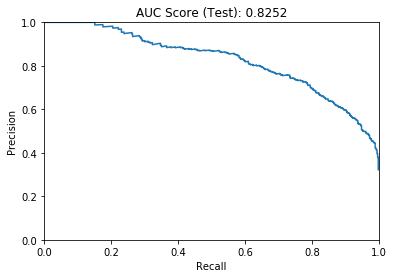

In [14]:
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title("AUC Score (Test): {0:.4f}".format(pr_auc))
plt.show()

(0, 91.30000000000001)

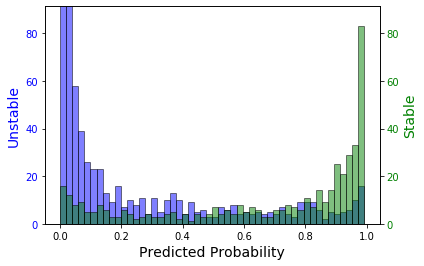

In [15]:
# Histogram:
bins = 50
Stable, Unstable = stable_unstable_hist(trainingdatafolder, model, features)

fig, ax1 = plt.subplots()
n, bins, pathces = ax1.hist(Unstable, bins, alpha=0.5, label='No', color='blue', edgecolor = "black")
#print(n)
ax1.set_xlabel('Predicted Probability', fontsize=14)
ax1.set_ylabel('Unstable',  fontsize=14, color='blue')
for tl in ax1.get_yticklabels():
    tl.set_color('blue')
    


ax2 = ax1.twinx()
n, bins , patches = ax2.hist(Stable, bins, alpha=0.5, label='Yes',color='green', edgecolor = "black")
#print(n.astype(int))
ax2.set_ylabel('Stable', fontsize=14, color='green')
for tl in ax2.get_yticklabels():
    tl.set_color('green')
    
    
#ax1.set_ylim(ax2.get_ylim())
ax1.set_ylim([0,1.1*n[-1]]) # goes up to ~4300
ax2.set_ylim([0,1.1*n[-1]]) # goes up to ~2100

Text(0, 0.5, 'Fraction actually stable')

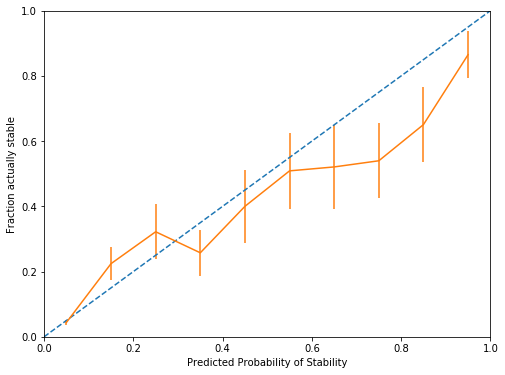

In [16]:
bincenters, fracstable, errorbars = calibration_plot(trainingdatafolder, model, features, bins=10)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.linspace(0,1,100), np.linspace(0,1,100), '--')
ax.errorbar(bincenters, fracstable, errorbars)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel('Predicted Probability of Stability')
ax.set_ylabel('Fraction actually stable')

Text(0.5, 1.0, 'Fraction of unstable systems mislabeled as stable')

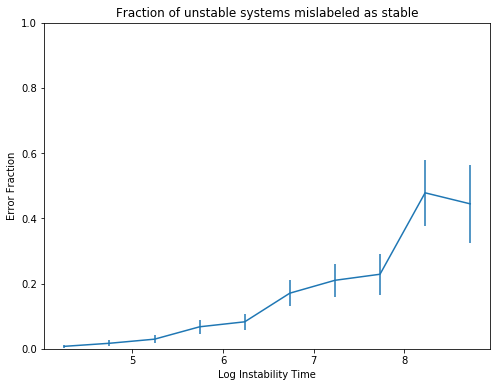

In [17]:
bincenters, errorfracs, errorbars = unstable_error_fraction(trainingdatafolder, model, features, bins=10)
fig, ax = plt.subplots(figsize=(8,6))
ax.errorbar(bincenters, errorfracs, errorbars)
ax.set_ylim([0,1])
ax.set_xlabel('Log Instability Time')
ax.set_ylabel('Error Fraction')
ax.set_title('Fraction of unstable systems mislabeled as stable')

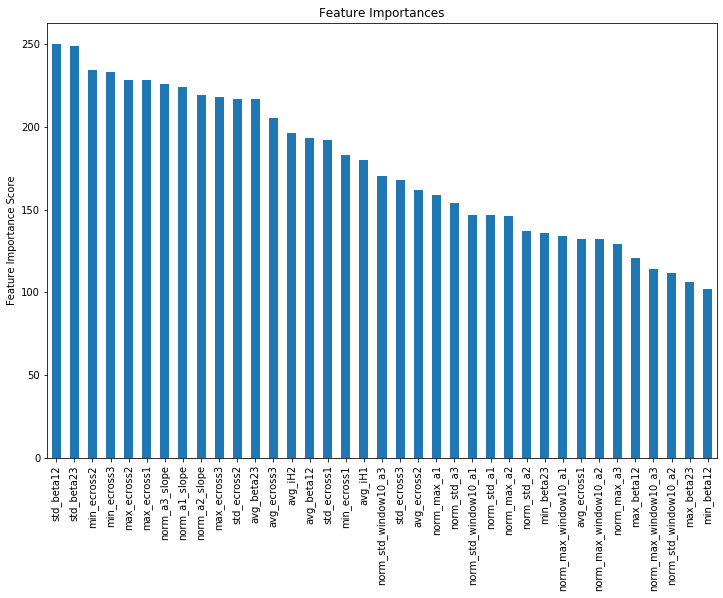

In [18]:
# feature importances
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances', figsize=(12,8))
plt.ylabel('Feature Importance Score')
plt.show()

In [19]:
dill.dump([model, features, featurefolder], open(datapath+"../models/orbsummaryfeaturesxgb_resonant.pkl", "wb"))